# Exercices - Statistique descriptive et inférentielle

L’objectif de ces exercices est de réaliser des statistiques descriptives et inférentielles sur un ensemble de données.

Soit la base de données brain_size_Mod.xlsx décrivant les caractéristiques
de cerveaux selon une étude scientifique (Willerman,1991). Cette base de
données comprend les caractéristiques suivantes.

1. Gender : Homme ou femme
2. FSIQ : Score de QI complet basé sur les quatre sous-tests de Wechsler
(1981)
3. VIQ : Score de QI verbal basé sur les quatre sous-tests de Wechsler
4. PIQ : Score de QI de performance basé sur les 4 sous-tests de Wechsler
5. Weight : poids du corps en livres
6. Height : hauteur en pouces
7. MRI_Count : nombre total de pixels des 18 balayages IRM
8. La variable Activity, qui décrit l’activité, a été ajoutée pour les simulations du cours


# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

brain_size_Mod_Original = pd.read_excel('brain_size_Mod.xlsx')
brain_size_Mod_Original.head(5)


,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,Activity
0,1,Female,133,132,124,118,64.5,816932,professor
1,2,Male,140,150,124,144,72.5,1001121,doctor
2,3,Male,139,123,150,143,73.3,1038437,farmer
3,4,Male,133,129,128,172,68.8,965353,doctor
4,5,Female,137,132,134,147,65.0,951545,artist


# Data Exploration

In [2]:
brain_size_Mod_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40 non-null     int64  
 1   Gender      40 non-null     object 
 2   FSIQ        40 non-null     int64  
 3   VIQ         40 non-null     int64  
 4   PIQ         40 non-null     int64  
 5   Weight      40 non-null     int64  
 6   Height      40 non-null     float64
 7   MRI_Count   40 non-null     int64  
 8   Activity    40 non-null     object 
dtypes: float64(1), int64(6), object(2)
memory usage: 2.9+ KB


# Excercise 1. Analysis univarie de donnes


## 1.1. Variable VIQ - Varibale quantitative

Pour la variable VIQ, évaluez les statistiques descriptives et visualisez
graphiquement ces statistiques le cas échéant. Interprétez et commentez
les résultats

In [3]:
VIQ = brain_size_Mod_Original['VIQ']
VIQ.head(5)

0    132
1    150
2    123
3    129
4    132
Name: VIQ, dtype: int64

In [4]:
VIQ.describe()


count     40.000000
mean     112.350000
std       23.616107
min       71.000000
25%       90.000000
50%      113.000000
75%      129.750000
max      150.000000
Name: VIQ, dtype: float64

## 1.1.2. Moyennes et mesures de la tendance centrale

https://towardsdatascience.com/statistics-central-tendency-5e514a2f98fd


In [5]:


VIQ.median()

113.0

In [6]:
brain_size_Mod_Original['VIQ'].max()

150

In [7]:
brain_size_Mod_Original['VIQ'].min()

71

In [8]:
import statistics 

statistics.stdev(brain_size_Mod_Original['VIQ'])

23.616107063199742

In [9]:
statistics.variance(brain_size_Mod_Original['VIQ'])

557.7205128205128

In [10]:
statistics.mean(brain_size_Mod_Original['VIQ'])

112.35

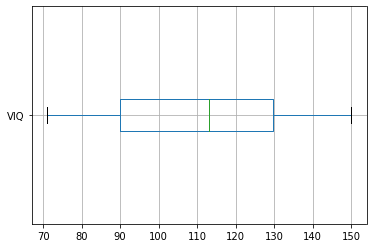

In [11]:
brain_size_Mod_Original.boxplot(column="VIQ",vert=False)

In [12]:
brain_size_Mod_Original['VIQ'].quantile(q=(0.25,0.5,0.75,0.1))

0.25     90.00
0.50    113.00
0.75    129.75
0.10     85.70
Name: VIQ, dtype: float64

## 1.1.3. Distribution

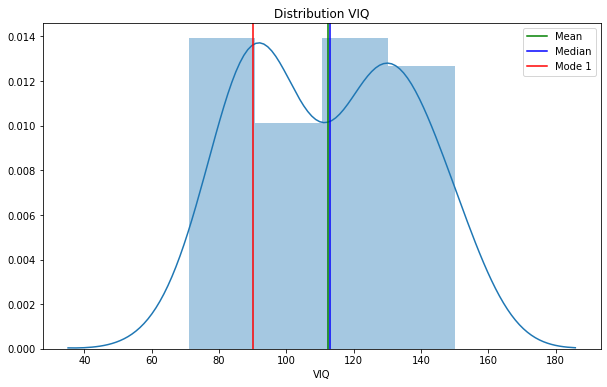

In [13]:
import seaborn as sns

mean=brain_size_Mod_Original['VIQ'].mean();
median=brain_size_Mod_Original['VIQ'].median();
mode=brain_size_Mod_Original['VIQ'].mode();
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(brain_size_Mod_Original['VIQ']);
plt.title('Distribution VIQ');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend()

# 1.4. Variable ACTIVITY - categorical variable

In [14]:
brain_size_Mod_Original['Activity'].describe()

count         40
unique         5
top       doctor
freq          12
Name: Activity, dtype: object

In [15]:
E1 = brain_size_Mod_Original['Activity'].value_counts(normalize=True) * 100

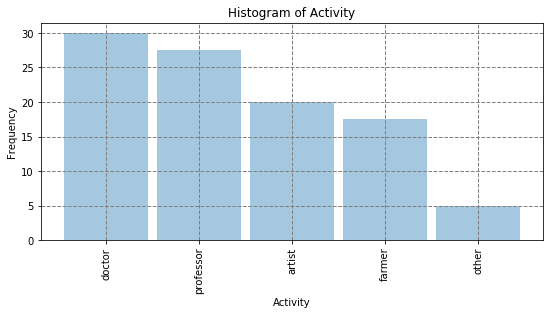

In [16]:
E1.plot(kind = 'bar',
           stacked = 'True',          # Muestra las barras apiladas
           alpha = 0.4,               # nivel de transparencia
           width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
           figsize=(9,4));

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title('Histogram of Activity')
plt.xlabel("Activity")
plt.ylabel("Frequency")
plt.show()

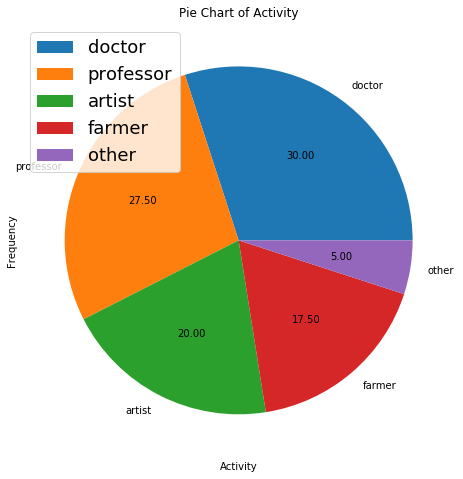

In [17]:

E1.plot.pie(subplots=True, figsize = (15,8), autopct='%.2f',)
plt.legend(E1.index, loc = 'upper left', fontsize = 18)
 
plt.title('Pie Chart of Activity')
plt.xlabel("Activity")
plt.ylabel("Frequency")
plt.show() #ok


In [18]:
# Table de frequences

In [19]:
E2 = pd.crosstab(brain_size_Mod_Original['Activity'],columns="Count")
E2

col_0,Count
Activity,
artist,8
doctor,12
farmer,7
other,2
professor,11


# Exercice 2 : Analyse bivariée des données


# 2.1. Évaluez les relations entre l’ensemble des variables quantitatives et visualisez ces relations. Interprétez et commentez les résultats.

In [20]:
FreqData2_table = pd.crosstab(index=brain_size_Mod_Original['Activity'],columns=brain_size_Mod_Original['Gender'])
FreqData2_table.reset_index()

Gender,Activity,Female,Male
0,artist,8,0
1,doctor,1,11
2,farmer,0,7
3,other,2,0
4,professor,9,2


Text(0.5, 0, 'Activity')

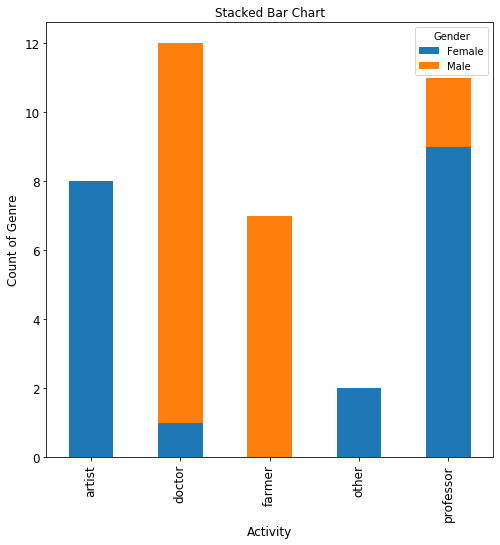

In [21]:
Stacked = FreqData2_table.plot(kind="bar",figsize=(8,8),stacked=True,title='Stacked Bar Chart',fontsize=12)
Stacked.set_ylabel("Count of Genre",fontsize=12)
Stacked.set_xlabel("Activity",fontsize=12)


# 2.2. Pensez-vous que les variables PIQ et FSIQ sont linéairement reliées ?
Faites une analyse numérique et une analyse graphique. Interprétez et
commentez les résultats.

In [22]:
brain_size_Mod_Original.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,40.00000,40.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,150.80000,68.662500,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,22.90023,4.036988,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.00000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.75000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.50000,68.250000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.00000,70.875000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.00000,77.000000,1.079549e+06


Text(0.5, 1.0, 'Variation de PIQ en relation a FSIQ')

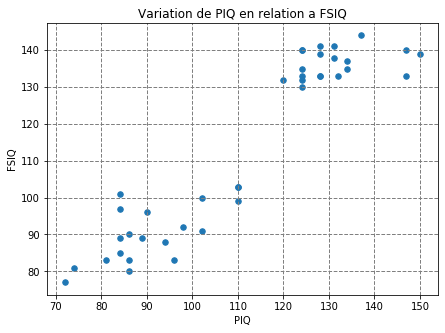

In [23]:
fig = plt.figure(figsize=(7,5))
plt.scatter(brain_size_Mod_Original['PIQ'], brain_size_Mod_Original['FSIQ'], s=30) #x,y
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("FSIQ")
plt.xlabel("PIQ")
plt.title('Variation de PIQ en relation a FSIQ')

In [24]:

corr = brain_size_Mod_Original.corr()
corr

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Unnamed: 0,1.000000,-0.334072,-0.241473,-0.371150,0.180637,0.122380,-0.139724
FSIQ,-0.334072,1.000000,0.946639,0.934125,-0.053906,-0.126182,0.357641
VIQ,-0.241473,0.946639,1.000000,0.778135,-0.080230,-0.111204,0.337478
PIQ,-0.371150,0.934125,0.778135,1.000000,0.001704,-0.112429,0.386817
Weight,0.180637,-0.053906,-0.080230,0.001704,1.000000,0.661190,0.491964
Height,0.122380,-0.126182,-0.111204,-0.112429,0.661190,1.000000,0.579466
MRI_Count,-0.139724,0.357641,0.337478,0.386817,0.491964,0.579466,1.000000


La correlation entre PIQ et FSIQ est 0,9341, donc ilya une forte correlaton

In [25]:
# Regression Lineaire

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

x1 = np.array(brain_size_Mod_Original['PIQ']).reshape((-1,1))
y1 = brain_size_Mod_Original['FSIQ']

mymodel = LinearRegression()
results = mymodel.fit(x1,y1)

print("Coeficient determination: \n", results.score(x1, y1))
print("Intercept: \n", results.intercept_)
print("Slope: \n", results.coef_)

Coeficient determination: 
 0.8725897911338812
Intercept: 
 2.3033645246591448
Slope: 
 [1.00109557]


In [26]:
from math import *

r_sq = results.score(x1,y1)
print("Coefficient de determination: ", r_sq)
print("Coefficient de determination racine carre: ", sqrt(r_sq))

Coefficient de determination:  0.8725897911338812
Coefficient de determination racine carre:  0.9341251474689466


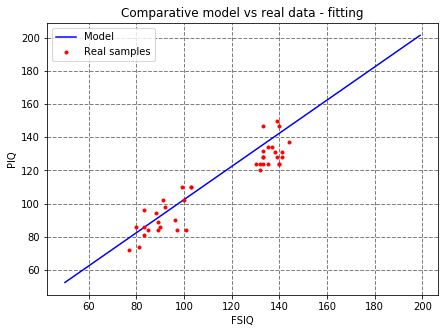

In [27]:
# Graphique de regression

def Yy(m, b, x):
    return m*x + b;

Xmodel = range(50,200, 1)
Ymodel = Yy(results.coef_, results.intercept_,  Xmodel)


plt.figure(figsize=(7,5))
plt.plot(Xmodel, Yy(results.coef_, results.intercept_,  Xmodel), 'b-', label='Model')
plt.plot(brain_size_Mod_Original['FSIQ'], brain_size_Mod_Original['PIQ'], 'r.', label='Real samples') #x,y
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("PIQ")
plt.xlabel("FSIQ")
plt.title('Comparative model vs real data - fitting')
plt.legend(loc='best')
plt.show()

# Another methode of regression

In [28]:
from statsmodels.formula.api import ols

model2 = ols('FSIQ ~ PIQ', data=brain_size_Mod_Original).fit() #x vs y
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   FSIQ   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     260.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.37e-18
Time:                        17:53:58   Log-Likelihood:                -142.30
No. Observations:                  40   AIC:                             288.6
Df Residuals:                      38   BIC:                             292.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3034      7.026      0.328      0.7

# 2.3 Pensez-vous que les variables Activity et FSIQ sont reliées ? 
Faites une analyse numérique et une analyse graphique. Interprétez et commentez les résultats.

In [29]:
#Using ANOVA

model3 = ols('FSIQ ~ Activity', data=brain_size_Mod_Original).fit() #x vs y
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   FSIQ   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.404
Date:                Mon, 08 Mar 2021   Prob (F-statistic):              0.253
Time:                        17:53:58   Log-Likelihood:                -180.53
No. Observations:                  40   AIC:                             371.1
Df Residuals:                      35   BIC:                             379.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               119.37

# BoxPlot

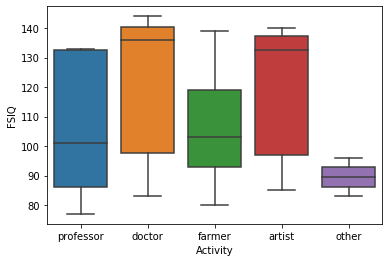

In [30]:
sns.boxplot(x='Activity', y='FSIQ', data=brain_size_Mod_Original)

# Pensez-vous que les variables Activity et Gender sont reliées ? Faites une analyse numérique

In [31]:

table = pd.crosstab(brain_size_Mod_Original['Activity'], brain_size_Mod_Original['Gender'])
table

Gender,Female,Male
Activity,,
artist,8,0
doctor,1,11
farmer,0,7
other,2,0
professor,9,2


In [32]:
table2 = pd.crosstab(brain_size_Mod_Original['Gender'], brain_size_Mod_Original['Activity'])  #user parameter normalize to %
table2

Activity,artist,doctor,farmer,other,professor
Gender,,,,,
Female,8,1,0,2,9
Male,0,11,7,0,2


In [33]:
# There are 40 samples.

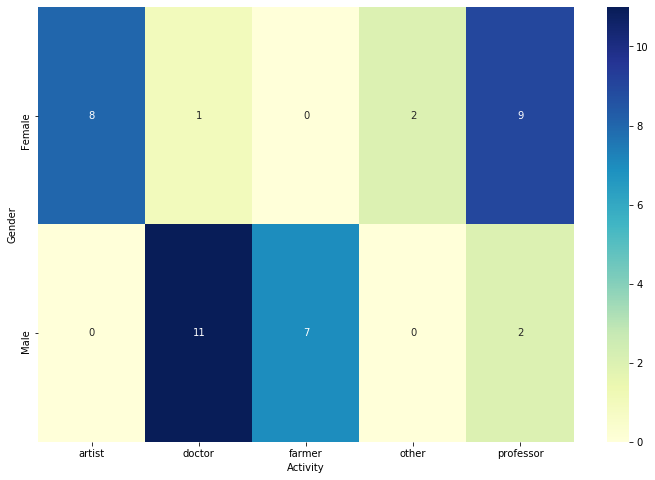

In [34]:
plt.figure(figsize=(12,8)) 
sns.heatmap(table2, annot=True, cmap="YlGnBu")

# Research py

In [35]:
import researchpy as rp

rp.summary_cat(brain_size_Mod_Original[["Gender", "Activity"]])  # Descriptive analysis if wanted

,Variable,Outcome,Count,Percent
0,Gender,Female,20,50.0
1,,Male,20,50.0
2,Activity,doctor,12,30.0
3,,professor,11,27.5
4,,artist,8,20.0
5,,farmer,7,17.5
6,,other,2,5.0


# Calcule de Chi2

In [39]:
from scipy.stats import chi2_contingency

chi2, pvalue, dof, expected  = chi2_contingency(table)

print("Chi square: ", chi2)
print("p-value: ", pvalue)
print("Degree of liber:", dof)


Chi square:  29.78787878787879
p-value:  5.405997743214392e-06
Degree of liber: 4


In [40]:
# interpret p-value 
alpha = 0.05
if pvalue <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


In [ ]:
expected

In [ ]:
crosstab, test_results, expected = rp.crosstab(brain_size_Mod_Original["Gender"], brain_size_Mod_Original["Activity"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

In [ ]:
For example, a probability of 95% can be used, suggesting that the finding of the test is quite
likely given the assumption of the test that the variable is independent. If the statistic is less than or equal 
to the critical value, we can fail to reject this assumption, otherwise it can be rejected.


# Excercise 3 - Hipotesys HO

In [42]:
from scipy import stats

results = stats.ttest_1samp(brain_size_Mod_Original['FSIQ'], 100, 0)
print('stattiscit: ', results[0])
print('p_value: ', results[1])

stattiscit:  3.532307014238269
p_value:  0.0010766792736967715


In [45]:
# interpret p-value 
alpha = 0.05
if results[1] <= alpha: 
    print('(reject H0)') 
else: 
    print('(H0 holds true)') 

(H0 holds true)


In [ ]:
Le deuxieme cas cest pas possible parce que on a pas de parametre fixe a tester?

In [ ]:
# Avec population 112

In [46]:
results = stats.ttest_1samp(brain_size_Mod_Original['FSIQ'], 112, 0)
print('stattiscit: ', results[0])
print('p_value: ', results[1])

# interpret p-value 
alpha = 0.05
if results[1] <= alpha: 
    print('(reject H0)') 
else: 
    print('(H0 holds true)') 
    
    

stattiscit:  0.3808063323899999
p_value:  0.7054134495786346
(H0 holds true)


In [47]:
results = stats.ttest_1samp(brain_size_Mod_Original['FSIQ'], 160, 0)
print('stattiscit: ', results[0])
print('p_value: ', results[1])

# interpret p-value 
alpha = 0.05
if results[1] <= alpha: 
    print('(reject H0)') 
else: 
    print('(H0 holds true)') 
    

stattiscit:  -12.225196395003076
p_value:  6.463088405992505e-15
(reject H0)


In [48]:
results = stats.ttest_1samp(brain_size_Mod_Original['FSIQ'], 90, 0)
print('stattiscit: ', results[0])
print('p_value: ', results[1])

# interpret p-value 
alpha = 0.05
if results[1] <= alpha: 
    print('(reject H0)') 
else: 
    print('(H0 holds true)') 

stattiscit:  6.15855758244516
p_value:  3.118953534482729e-07
(reject H0)
